<a href="https://colab.research.google.com/github/Nsad9579/Clinical-Projects/blob/main/PySpiro_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small Air Way Disease Risk Prediction Using Machine Learning

## Import Packages

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')

In [7]:
df = pd.read_csv('/content/DatasetClass.csv')
df.head()

,Unnamed: 0,RIDAGEYR,BMXHT,RIDRETH1,SMQ680,CDQ001,CDQ010,HSD010,HSQ500,HSQ520,...,WHD020,BMXWT,MCQ300B,MCQ010,spxraw,spxpts,Label,True_FEV1,NL_FEV1,RiskClass
0,41475.0,62.0,154.7,5.0,2.0,1.0,1.0,3.0,2.0,2.0,...,308.0,138.9,2.0,1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, ...",966.0,83.799289,1.528,1.823405,5
1,41476.0,6.0,120.4,5.0,NaN,NaN,NaN,NaN,2.0,2.0,...,NaN,22.0,2.0,2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",601.0,72.424378,1.351,1.865394,4
2,41479.0,52.0,154.4,1.0,2.0,2.0,2.0,4.0,2.0,2.0,...,142.0,65.7,2.0,2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1201.0,93.820990,2.478,2.641200,5
3,41481.0,21.0,182.7,4.0,2.0,NaN,NaN,1.0,2.0,2.0,...,175.0,77.9,2.0,2.0,"[0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -...",987.0,87.805837,3.634,4.138677,5
4,41482.0,64.0,173.8,1.0,2.0,2.0,1.0,4.0,2.0,2.0,...,228.0,101.6,2.0,2.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1175.0,81.057748,2.535,3.127400,5


In [8]:
features = [ 'SMQ680', 'CDQ001' , 'CDQ010' , 'HSD010' , 'HSQ500' , 
               'HSQ520' , 'RIAGENDR' , 'RIDAGEEX' , 'DIQ010' , 'OCD390G' , 'OCQ510' , 'OCQ530' , 
               'OCQ550' , 'OCQ570' , 'RDQ070' , 'RDQ031' , 'RDQ140' , 'RDQ050' , 'SLD010H' , 'SLQ050' , 'SLQ090' , 'SLQ100' , 'SLQ120' , 
               'SMQ020' , 'SMD410' , 'BMXWT'  , 'MCQ300B' , 'MCQ010' ]
X = df[features]
Y = df['RiskClass']

In [ ]:
X = X.astype('category')
X[['BMXWT' , 'RIDAGEEX' , 'SLD010H'  ]] = X[['BMXWT' , 'RIDAGEEX' , 'SLD010H'  ]].astype('float64')

In [ ]:
X.dtypes

SMQ680      category
CDQ001      category
CDQ010      category
HSD010      category
HSQ500      category
HSQ520      category
RIAGENDR    category
RIDAGEEX     float64
DIQ010      category
OCD390G     category
OCQ510      category
OCQ530      category
OCQ550      category
OCQ570      category
RDQ070      category
RDQ031      category
RDQ140      category
RDQ050      category
SLD010H      float64
SLQ050      category
SLQ090      category
SLQ100      category
SLQ120      category
SMQ020      category
SMD410      category
BMXWT        float64
MCQ300B     category
MCQ010      category
dtype: object

## EDA

In [ ]:
X.info()
# but it's not that easy because in NHANES some of the null values are coded numerically

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18658 entries, 0 to 18657
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   SMQ680    18658 non-null  category
 1   CDQ001    18658 non-null  category
 2   CDQ010    18658 non-null  category
 3   HSD010    18658 non-null  category
 4   HSQ500    18658 non-null  category
 5   HSQ520    18658 non-null  category
 6   RIAGENDR  18658 non-null  category
 7   RIDAGEEX  18658 non-null  float64 
 8   DIQ010    18658 non-null  category
 9   OCD390G   18658 non-null  category
 10  OCQ510    18658 non-null  category
 11  OCQ530    18658 non-null  category
 12  OCQ550    18658 non-null  category
 13  OCQ570    18658 non-null  category
 14  RDQ070    18658 non-null  category
 15  RDQ031    18658 non-null  category
 16  RDQ140    18658 non-null  category
 17  RDQ050    18658 non-null  category
 18  SLD010H   18658 non-null  float64 
 19  SLQ050    18658 non-null  category
 20  SLQ090

In [ ]:
X.describe()

,RIDAGEEX,SLD010H,BMXWT
count,12453.000000,14216.000000,18572.000000
mean,436.821328,6.930782,72.619126
std,251.913443,3.110916,25.891256
min,73.000000,1.000000,16.100000
25%,202.000000,6.000000,56.700000
50%,416.000000,7.000000,71.900000
75%,642.000000,8.000000,88.000000
max,959.000000,99.000000,239.400000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

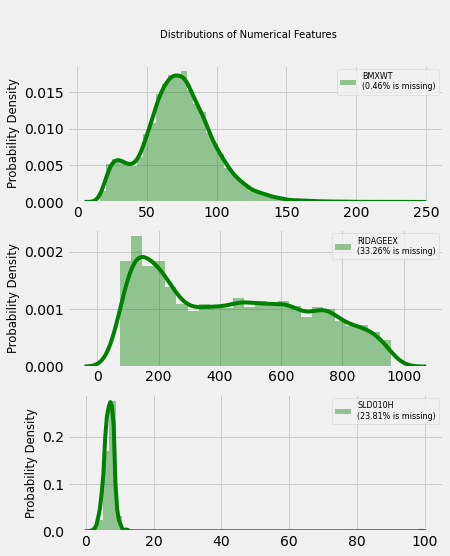

In [28]:
n_rows, n_cols = (3,1)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(6, 8))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=10)

for x in range (0,3):

    miss_perc="%.2f"%(100*(1-(X[num_cols[x]].dropna().shape[0])/X.shape[0]))
    column = num_cols[x]
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig=sns.distplot(X[column], color="g", label=collabel, norm_hist=True, ax=axes[x], kde_kws={"lw":4})
    fig=fig.legend(loc='best', fontsize=8)
    axes[x].set_ylabel("Probability Density",fontsize='small')
    axes[x].set_xlabel(None)

plt.show()

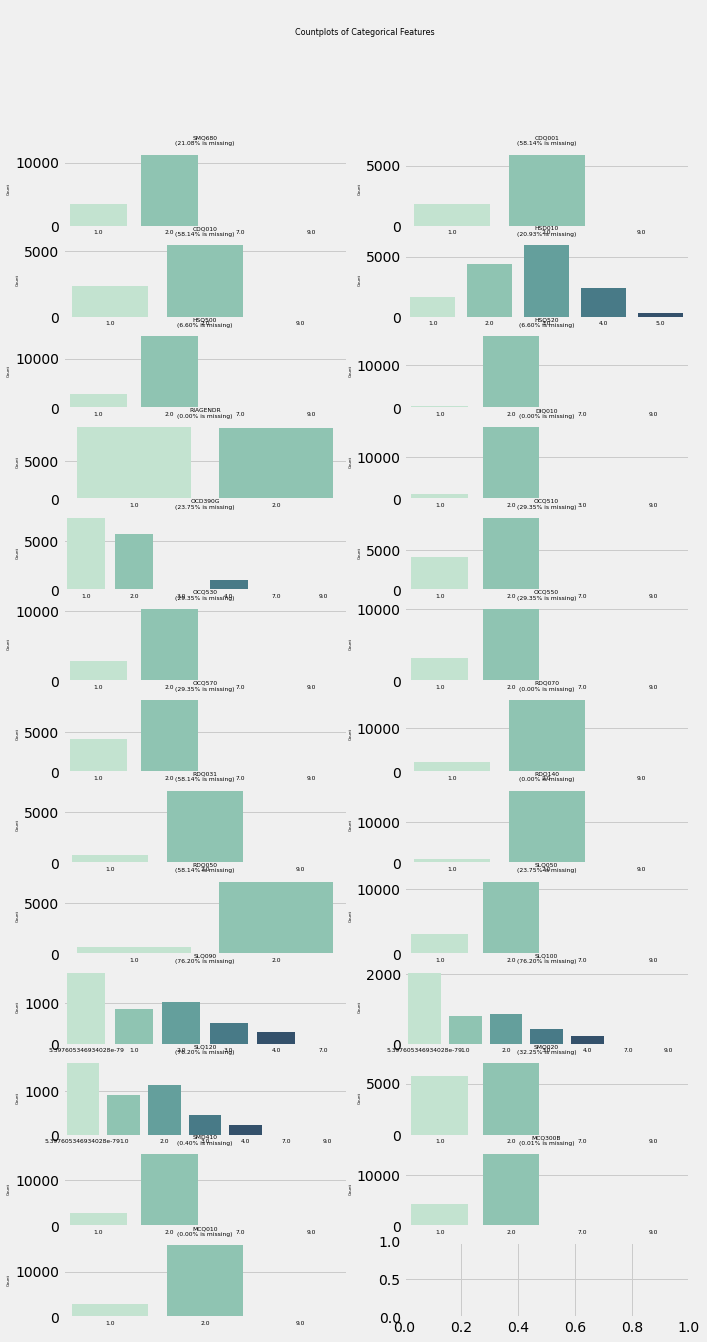

In [30]:
n_rows, n_cols = (13,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10, 20))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=8)

for index, column in enumerate(categorical_cols):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(X[column].dropna().shape[0])/X.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=X ,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=6)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=4)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=6)

plt.show()

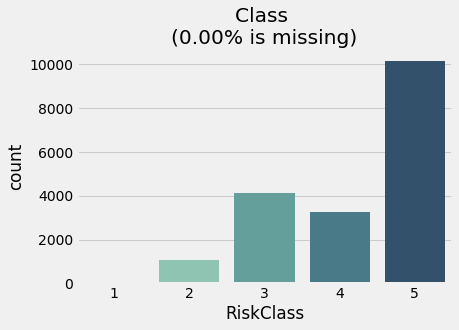

In [ ]:
miss_perc="%.2f"%(100*(1-(Y.dropna().shape[0])/Y.shape[0]))
    
label="class \n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=Y,label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Class \n({}% is missing)".format(miss_perc))
plt.show()

In [ ]:
style.use('seaborn-darkgrid')

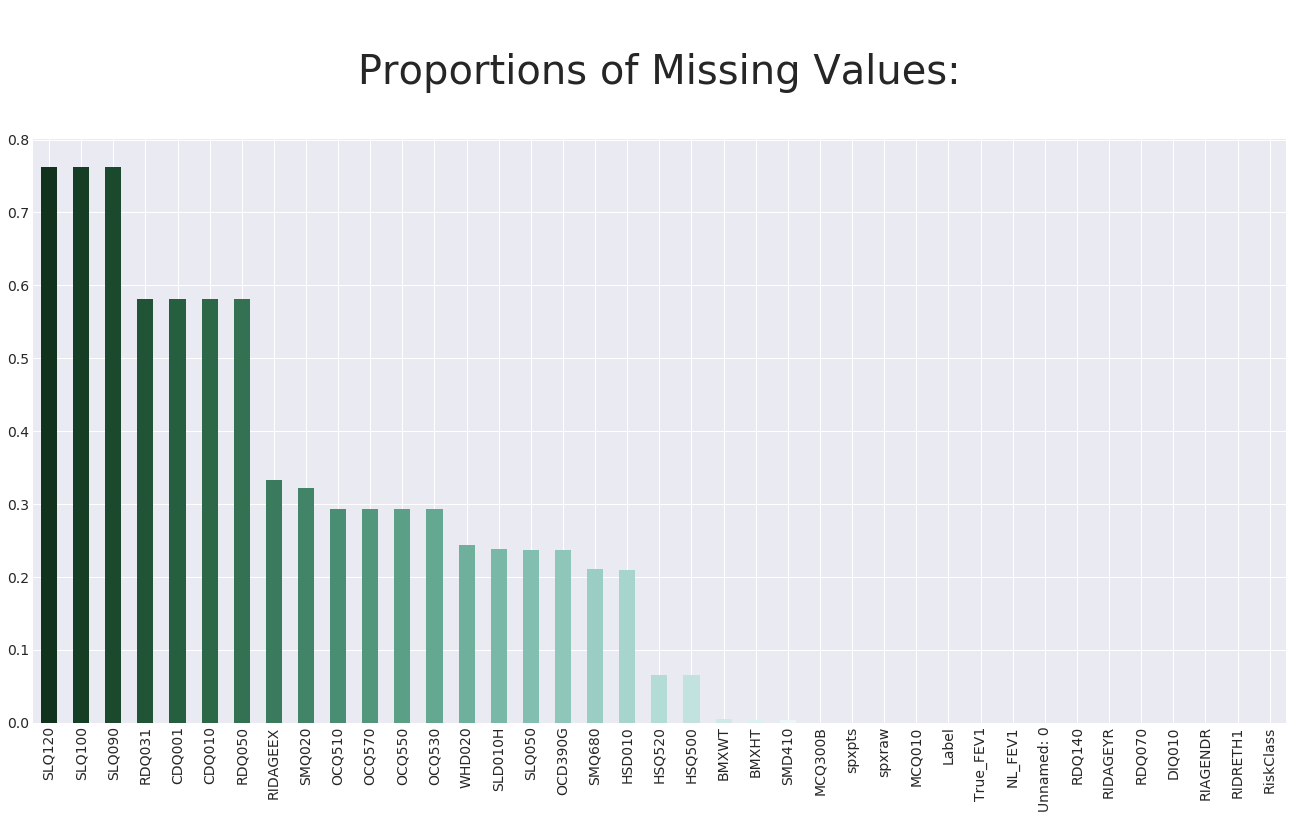

In [ ]:
d=((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

## PreProcessing

 *first of all let's see what is our features ?* <br>
 
 | veriable | definition | missing values| type | expl |
 | --- | --- | --- | --- | --- |
 | 'SMQ680' | Used tobacco/nicotine last 5 days? |   7 , 9 , .  | categorical | 1 = Y , 2 = N |
 | 'CDQ001' | SP ever had pain or discomfort in chest |   7 , 9 , .  | categorical | 1 = Y , 2 = N |
 | 'CDQ010' | Shortness of breath on stairs/inclines |   7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'HSD010' | I have some general questions about {your/SP's} health. Would you say {your/SP's} health in general is . . . |  7 , 9 , .   | categorical | 1 = Exc , 2 = very good , 3= good , 4 = fair , 5 = poor |
 | 'HSQ500' | SP have head cold or chest cold |   7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'HSQ520' | SP have flu, pneumonia, ear infection?  | 7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'RIAGENDR' | Gender | .   | categorical | 1 = M , 2 = F |
 | 'RIDAGEEX' | Age in Months at Exam |  .   | numeric | 0 - 959 |
 | 'DIQ010'   | Doctor told you have diabetes | 7 , 9 , .   | categorical | 1 = Y , 2 = N , 3= borderline |
 | 'OCD390G'  | Kind of work you have done the longest |  7 , 9 , .   | categorical | 1 = Enter occupation , 2 = Same as current occupation  , 3= Armed forces , 4 = Never worked |
 | 'OCQ510' | Ever had work exposure to mineral dusts? | 7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'OCQ530' | Ever had work exposure to organic dusts? | 7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'OCQ550' | Ever exposed to exhaust fumes at work? |  7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'OCQ570' | Ever had work exposure to other fumes? | 7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'RDQ070' | Wheezing or whistling in chest - past yr | 7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'RDQ031' | Coughing most days - over 3 mo period |  7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'RDQ140' | Had dry cough at night in past year |  7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'RDQ050' | Bring up phlegm most days - 3 mo period |  7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'SLD010H' | How much sleep do you get (hours)? | 77 , 99 , .   | numeric | 1-11 , 12(for more than 12 hours) |
 | 'SLQ050' | Ever told doctor had trouble sleeping |  7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'SLQ090' | How often wake up during night? |  7 , 9 , .   | categorical | 0= Never , 1 = Rarely , 2 = Sometimes , 3= Often , 4 = Almost always |
 | 'SLQ100' | How often wake up too early in morning? | 7 , 9 , .   | categorical | 0= Never , 1 = Rarely , 2 = Sometimes , 3= Often , 4 = Almost always |
 | 'SLQ120' | How often feel overly sleepy during day? | 7 , 9 , .   | categorical | 0= Never , 1 = Rarely , 2 = Sometimes , 3= Often , 4 = Almost always | 
 | 'SMQ020' | Smoked at least 100 cigarettes in life |   7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'SMD410' | Does anyone smoke inside home? | 7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'BMXWT'  | Weight (kg) | . | numeric | 3.1 to 218.2  |
 | 'MCQ300B' | Close relative had asthma? |  7 , 9 , .   | categorical | 1 = Y , 2 = N |
 | 'MCQ010'  | Ever been told you have asthma | 7 , 9 , .   | categorical | 1 = Y , 2 = N |

### Aproach to Missing Values

In [22]:
categorical_cols = ['SMQ680', 'CDQ001' , 'CDQ010' , 'HSD010' , 'HSQ500' , 'HSQ520' , 'RIAGENDR' , 'DIQ010' , 'OCD390G' ,
                    'OCQ510' , 'OCQ530' ,'OCQ550' , 'OCQ570' , 'RDQ070' , 'RDQ031' , 'RDQ140' , 'RDQ050' , 'SLQ050' ,
                    'SLQ090' , 'SLQ100' , 'SLQ120' , 'SMQ020' , 'SMD410' , 'MCQ300B' , 'MCQ010' ]
num_cols = ['BMXWT' , 'RIDAGEEX' , 'SLD010H'  ]

In [ ]:
X[categorical_cols] = X[categorical_cols].replace([7,9], np.NaN)
X['SLD010H'] = X['SLD010H'].replace([77,99], np.NaN)

#### for numeric features 

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
X[num_cols] = knn_imputer.fit_transform(X[num_cols])

In [ ]:
percent_missing = round(X[num_cols].isnull().sum()/len(X[num_cols])*100,2)
print(percent_missing)

BMXWT       0.0
RIDAGEEX    0.0
SLD010H     0.0
dtype: float64


#### for categorical features 

In [ ]:
simple_imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
simple_imputer_cat.fit(X[categorical_cols])
X[categorical_cols] = simple_imputer_cat.transform(X[categorical_cols])

In [ ]:
percent_missing = round(X[categorical_cols].isnull().sum()/len(X[categorical_cols])*100,2)
print(percent_missing)

SMQ680      0.0
CDQ001      0.0
CDQ010      0.0
HSD010      0.0
HSQ500      0.0
HSQ520      0.0
RIAGENDR    0.0
DIQ010      0.0
OCD390G     0.0
OCQ510      0.0
OCQ530      0.0
OCQ550      0.0
OCQ570      0.0
RDQ070      0.0
RDQ031      0.0
RDQ140      0.0
RDQ050      0.0
SLQ050      0.0
SLQ090      0.0
SLQ100      0.0
SLQ120      0.0
SMQ020      0.0
SMD410      0.0
MCQ300B     0.0
MCQ010      0.0
dtype: float64


### Encoding categorical features

In [ ]:
# all feature except 3 of them 
categorical_cols  = [ 'SMQ680', 'CDQ001' , 'CDQ010' , 'HSD010' , 'HSQ500' , 
               'HSQ520' , 'RIAGENDR' , 'DIQ010' , 'OCD390G' , 'OCQ510' , 'OCQ530' , 
               'OCQ550' , 'OCQ570' , 'RDQ070' , 'RDQ031' , 'RDQ140' , 'RDQ050' , 'SLQ050' , 'SLQ090' , 'SLQ100' , 'SLQ120' , 
               'SMQ020' , 'SMD410' , 'MCQ300B' , 'MCQ010' ]
X_cat = X[categorical_cols]

SMQ680    category
CDQ001    category
CDQ010    category
HSD010    category
HSQ500    category
dtype: object

In [ ]:
X[categorical_cols].nunique()

SMQ680      2
CDQ001      2
CDQ010      2
HSD010      5
HSQ500      2
HSQ520      2
RIAGENDR    2
DIQ010      3
OCD390G     4
OCQ510      2
OCQ530      2
OCQ550      2
OCQ570      2
RDQ070      2
RDQ031      2
RDQ140      2
RDQ050      2
SLQ050      2
SLQ090      5
SLQ100      5
SLQ120      5
SMQ020      2
SMD410      2
MCQ300B     2
MCQ010      2
dtype: int64

In [ ]:
one_hot_encoded_data = pd.get_dummies(X, columns = categorical_cols)

In [ ]:
one_hot_encoded_data.columns

Index(['RIDAGEEX', 'SLD010H', 'BMXWT', 'SMQ680_1.0', 'SMQ680_2.0',
       'CDQ001_1.0', 'CDQ001_2.0', 'CDQ010_1.0', 'CDQ010_2.0', 'HSD010_1.0',
       'HSD010_2.0', 'HSD010_3.0', 'HSD010_4.0', 'HSD010_5.0', 'HSQ500_1.0',
       'HSQ500_2.0', 'HSQ520_1.0', 'HSQ520_2.0', 'RIAGENDR_1.0',
       'RIAGENDR_2.0', 'DIQ010_1.0', 'DIQ010_2.0', 'DIQ010_3.0', 'OCD390G_1.0',
       'OCD390G_2.0', 'OCD390G_3.0', 'OCD390G_4.0', 'OCQ510_1.0', 'OCQ510_2.0',
       'OCQ530_1.0', 'OCQ530_2.0', 'OCQ550_1.0', 'OCQ550_2.0', 'OCQ570_1.0',
       'OCQ570_2.0', 'RDQ070_1.0', 'RDQ070_2.0', 'RDQ031_1.0', 'RDQ031_2.0',
       'RDQ140_1.0', 'RDQ140_2.0', 'RDQ050_1.0', 'RDQ050_2.0', 'SLQ050_1.0',
       'SLQ050_2.0', 'SLQ090_5.397605346934028e-79', 'SLQ090_1.0',
       'SLQ090_2.0', 'SLQ090_3.0', 'SLQ090_4.0',
       'SLQ100_5.397605346934028e-79', 'SLQ100_1.0', 'SLQ100_2.0',
       'SLQ100_3.0', 'SLQ100_4.0', 'SLQ120_5.397605346934028e-79',
       'SLQ120_1.0', 'SLQ120_2.0', 'SLQ120_3.0', 'SLQ120_4.0', 'SMQ020_1.

In [ ]:
dropped_cols = ['SMQ680_2.0' , 'CDQ001_2.0' , 'CDQ010_2.0' , 'HSQ500_2.0' , 'HSQ520_2.0' , 'OCQ510_2.0' , 'OCQ550_2.0' ,
                'OCQ570_2.0' , 'RDQ070_2.0' , 'RDQ031_2.0' , 'RDQ140_2.0' , 'RDQ050_2.0' , 'SLQ050_2.0' , 'SMQ020_2.0' , 
                'SMD410_2.0' , 'MCQ300B_2.0' , 'MCQ010_2.0' ]

In [ ]:
one_hot_encoded_data = one_hot_encoded_data.drop(dropped_cols , axis=1)

In [ ]:
one_hot_encoded_data.head()

,RIDAGEEX,SLD010H,BMXWT,SMQ680_1.0,CDQ001_1.0,CDQ010_1.0,HSD010_1.0,HSD010_2.0,HSD010_3.0,HSD010_4.0,...,SLQ100_4.0,SLQ120_5.397605346934028e-79,SLQ120_1.0,SLQ120_2.0,SLQ120_3.0,SLQ120_4.0,SMQ020_1.0,SMD410_1.0,MCQ300B_1.0,MCQ010_1.0
0,752.0,6.0,138.9,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,82.0,7.6,22.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,630.0,6.0,65.7,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,254.0,6.0,77.9,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,779.0,8.0,101.6,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


### Scaling 

In [ ]:
X_num = one_hot_encoded_data[num_cols]
scaler = MinMaxScaler()
scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)

In [ ]:
one_hot_encoded_data[num_cols] = pd.DataFrame(X_num_scaled, columns = num_cols)

In [ ]:
one_hot_encoded_data

,RIDAGEEX,SLD010H,BMXWT,SMQ680_1.0,CDQ001_1.0,CDQ010_1.0,HSD010_1.0,HSD010_2.0,HSD010_3.0,HSD010_4.0,...,SLQ100_4.0,SLQ120_5.397605346934028e-79,SLQ120_1.0,SLQ120_2.0,SLQ120_3.0,SLQ120_4.0,SMQ020_1.0,SMD410_1.0,MCQ300B_1.0,MCQ010_1.0
0,0.766366,0.454545,0.549933,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0.010158,0.600000,0.026422,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.628668,0.454545,0.222123,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.204289,0.454545,0.276758,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.796840,0.636364,0.382893,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18653,0.302483,0.636364,0.321093,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
18654,0.117381,0.727273,0.180923,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
18655,0.042438,0.581818,0.072548,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
18656,0.578555,0.454545,0.278997,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
one_hot_encoded_data.to_csv('Raw Data/PreprocessedData.csv')

### Model Training

In [5]:
one_hot_encoded_data = pd.read_csv('/content/PreprocessedData.csv')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(one_hot_encoded_data, Y , test_size=0.33, random_state=42)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score,KFold
lin_svc=SVC(kernel='linear')

### Without cross validation 

In [15]:
SVM_RBF=SVC()
    
SVM_Poly2=SVC(kernel='poly',degree=2)
    
SVM_Poly3=SVC(kernel='poly',degree=3)

KNN3=KNeighborsClassifier(n_neighbors=3,weights='distance')

KNN8=KNeighborsClassifier(n_neighbors=8,weights='distance')

KNN15=KNeighborsClassifier(n_neighbors=15,weights='distance')

Naive_Bayes=GaussianNB()

LogReg=LogisticRegression()

Tree=DecisionTreeClassifier()

Forest=RandomForestClassifier()

models=[SVM_RBF,SVM_Poly2,SVM_Poly3,KNN3,KNN8,KNN15,Naive_Bayes,LogReg,Tree,Forest]

names=["SVM_RBF","SVM_Poly2","SVM_Poly3","Weighted 3NearestNeighbors","Weighted 8NearestNeighbors",
       "Weighted 15NearestNeighbors","Naive Bayes","Logistic Regression","Decision Tree","Random Forest"]

In [ ]:

for index in range(10):
    
    pca_tr_acc=[]
    
    pca_ts_acc=[]
    
    for n_comps in range(1,25):

            model=models[index]

            pca=PCA(n_components=n_comps)

            pca_model=make_pipeline(pca,model)

            pca_model.fit(X_train,Y_train)

            y_tr_pred= pca_model.predict(X_train)

            pca_tr_acc.append(accuracy_score(y_tr_pred,Y_train))

            y_ts_pred=pca_model.predict(X_test)

            pca_ts_acc.append(accuracy_score(y_ts_pred,Y_test))

    print(f'the accuracy of {names[index]} for train is : ' , max(pca_tr_acc) , 'and for test' , max(pca_ts_acc) )

the accuracy of SVM_RBF for train is :  0.54688 and for test 0.5388113023708997
the accuracy of SVM_Poly2 for train is :  0.54688 and for test 0.5388113023708997
the accuracy of SVM_Poly3 for train is :  0.54688 and for test 0.5388113023708997
the accuracy of Weighted 3NearestNeighbors for train is :  1.0 and for test 0.42270217603117893
the accuracy of Weighted 8NearestNeighbors for train is :  1.0 and for test 0.47190646313738227
the accuracy of Weighted 15NearestNeighbors for train is :  1.0 and for test 0.5004871711594674
the accuracy of Naive Bayes for train is :  0.60568 and for test 0.6109126339720689


/home/nsad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/nsad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

/home/nsad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


the accuracy of Logistic Regression for train is :  0.61144 and for test 0.6209808379343943
the accuracy of Decision Tree for train is :  1.0 and for test 0.5001623903864891
the accuracy of Random Forest for train is :  0.99992 and for test 0.6183825917505683


### with cross vald

In [20]:
import statistics
for index in range(10):
  
    score = []
    
    for n_comps in [5,10,15,25]:

            model=models[index]

            pca=PCA(n_components=n_comps)

            pca_model=make_pipeline(pca,model)
            
            kf=KFold(n_splits=5)
            
            score.append(cross_val_score(pca_model, X_train, Y_train, cv=kf))
            
    print(f'the accuracy of {names[index]}  with CROSS VALIDATION is : ' , score  )
    print(sum(score)/len(score))

the accuracy of SVM_RBF  with CROSS VALIDATION is :  [array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576]), array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576]), array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576]), array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576])]
[0.538  0.5536 0.5456 0.5396 0.5576]
the accuracy of SVM_Poly2  with CROSS VALIDATION is :  [array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576]), array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576]), array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576]), array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576])]
[0.538  0.5536 0.5456 0.5396 0.5576]
the accuracy of SVM_Poly3  with CROSS VALIDATION is :  [array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576]), array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576]), array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576]), array([0.538 , 0.5536, 0.5456, 0.5396, 0.5576])]
[0.538  0.5536 0.5456 0.5396 0.5576]
the accuracy of Weighted 3NearestNeighbors  with CROSS VALIDATION is :  [array([0.416 , 0.4384, 0.4308, 0.412 , 0.4272]), array([0.4092

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


the accuracy of Logistic Regression  with CROSS VALIDATION is :  [array([0.6048, 0.6128, 0.5968, 0.5948, 0.6076]), array([0.596 , 0.608 , 0.6032, 0.5876, 0.6028]), array([0.596 , 0.6068, 0.5984, 0.5976, 0.6072]), array([0.5976, 0.6188, 0.6   , 0.5976, 0.6084])]
[0.5986 0.6116 0.5996 0.5944 0.6065]
the accuracy of Decision Tree  with CROSS VALIDATION is :  [array([0.492 , 0.4852, 0.4768, 0.4824, 0.4948]), array([0.5104, 0.4852, 0.4788, 0.484 , 0.5064]), array([0.4808, 0.4828, 0.494 , 0.4844, 0.4996]), array([0.4972, 0.4904, 0.4856, 0.4808, 0.4932])]
[0.4951 0.4859 0.4838 0.4829 0.4985]
the accuracy of Random Forest  with CROSS VALIDATION is :  [array([0.596 , 0.594 , 0.6072, 0.592 , 0.6104]), array([0.6004, 0.6016, 0.608 , 0.602 , 0.6212]), array([0.6108, 0.6208, 0.6176, 0.5972, 0.6264]), array([0.6132, 0.616 , 0.6216, 0.6004, 0.6316])]
[0.6051 0.6081 0.6136 0.5979 0.6224]


In [ ]:
Y_train = Y_train -1
Y_test = Y_test -1

In [12]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, Y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(Y_test, preds)

0.6581682364404027

In [13]:
# Init classifier
xgb_cl = xgb.XGBClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(xgb_cl,X_test,Y_test,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.67857143 0.65178571 0.6525974  0.64500406 0.6303818 ]
Average Cross Validation score :0.6516680821209659
